# Project Introduction:

This project uses 2 datasets of taxi ride information using information on the most popular taxi cab companies and the dropoff locations.

**Objectives:**
1. Import the data
2. Prepare the data
3. Analyze the data; answers specific questions within project instructions
4. Test hypotheses

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
data_1= pd.read_csv('/datasets/project_sql_result_01.csv')

In [3]:
data_2=pd.read_csv('/datasets/project_sql_result_04.csv')

In [4]:
data_1

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [5]:
data_1.duplicated().sum()

0

In [6]:
data_1.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
data_2

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [9]:
data_2.duplicated().sum()

0

In [10]:
data_2.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [11]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [12]:
data_1['trips_amount'] = data_1['trips_amount'].round().astype(int)

In [13]:
data_2['average_trips']=data_2['average_trips'].round().astype(int)

In [14]:
data_1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [15]:
data_2.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547


For our dataframes we have done the following:

1. Imported the data
2. Checked for duplicates
3. Checked for missing values
4. Converted data types for trips_amount and average_trips from floats to integers


# Identify the top 10 drop off locations

In [16]:
data_2_sorted = data_2.sort_values(by='average_trips', ascending=False)

In [17]:
top_10_locations = data_2_sorted.head(10)

In [42]:
top_10_locations

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


<AxesSubplot:title={'center':'Average Number of Trips per Location'}, xlabel='Dropoff Location', ylabel='Avg Number of Trips (Nov 2017)'>

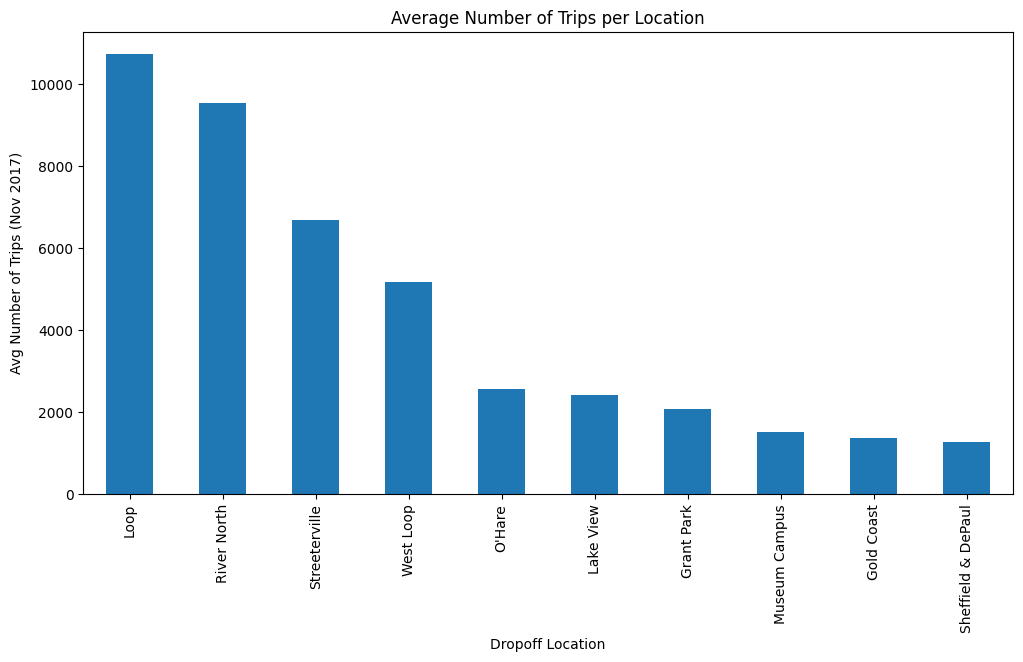

In [46]:
top_10_locations.plot(kind='bar',x='dropoff_location_name',legend=False, figsize=(12,6), xlabel= 'Dropoff Location', ylabel='Avg Number of Trips (Nov 2017)', title='Average Number of Trips per Location')


In this section we can see the number of trips for the 10 most requested dropoff locations in November of 2017. The Loop neighborhood is the most requested location with over 10,000 trips ending there.

# Taxi Company Analysis

In [20]:
data_1_sorted = data_1.sort_values(by='trips_amount', ascending=False)

In [21]:
taxi_top_10 = data_1_sorted.head(10)

In [22]:
taxi_top_10

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


<AxesSubplot:title={'center':'Number of Trips per Cab Service'}, xlabel='Taxi Company', ylabel='Number of Trips (Nov 2017)'>

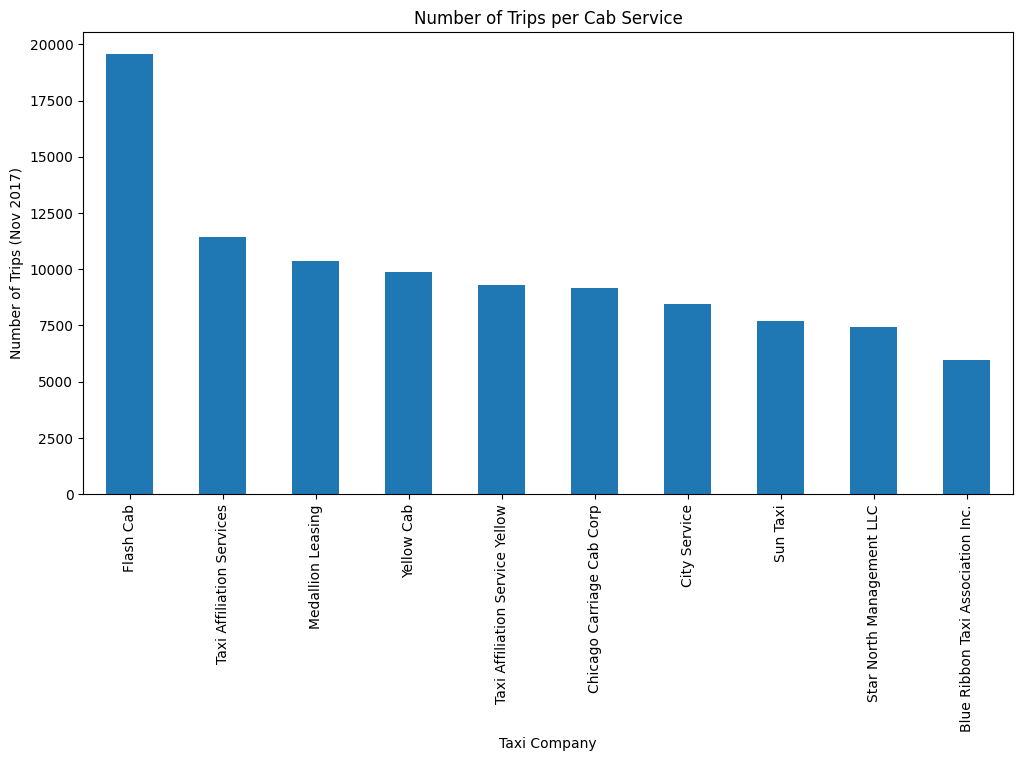

In [48]:
taxi_top_10.plot(kind='bar', x='company_name', figsize=(12,6), title='Number of Trips per Cab Service', legend=False, xlabel='Taxi Company', ylabel='Number of Trips (Nov 2017)')

Here we see the top 10 performing Taxi Companies in November of 2017 with Flash Cab being the highest performing at over 19,000 trips completed.  

# Testing Hypotheses

In this section we will import a 3rd datafram containing pickup date and time, weather conditions, and duration of the trips in seconds. We will do the following:

1. prepare the data
2. form our hypotheses for the data
3. test our hypotheses using our ttest method
4. accept of reject our hypotheses

In [24]:
data_3=pd.read_csv('/datasets/project_sql_result_07.csv')

In [25]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [26]:
data_3.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [27]:
data_3.duplicated().sum()

197

In [28]:
data_3 = data_3.drop_duplicates()

In [29]:
data_3['start_ts']= pd.to_datetime(data_3['start_ts'])

In [30]:
data_3['duration_seconds']=data_3['duration_seconds'].round().astype(int)

In [31]:
data_3.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


In [32]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 27.2+ KB


In our import of the data, there we some changes that needed to be made to the dataframe.

1. We dropped the duplicates (197 instances)
2. start_ts was converted from object to datetime format
3. duration_seconds was converted from object to integer

## Our Hypothesis
### Null: The average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is the same as on any other day
### Alternative: The average duration of rides from the Loop to O'Hare International Airport is not the same on rainy Saturdays

In [33]:
data_3['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [36]:
good_weather = data_3[data_3['weather_conditions'] == 'Good']['duration_seconds'].dropna()
bad_weather = data_3[data_3['weather_conditions'] == 'Bad']['duration_seconds'].dropna()

# Compute the means
mean_good_weather = good_weather.mean()
mean_bad_weather = bad_weather.mean()

print(f"Mean duration in good weather: {mean_good_weather}")
print(f"Mean duration in bad weather: {mean_bad_weather}")

# Perform a t-test for independent samples using raw data
t_stat, p_value = ttest_ind(good_weather, bad_weather, equal_var=False)  

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis.")

Mean duration in good weather: 2032.253112033195
Mean duration in bad weather: 2409.2297297297296
T-statistic: -5.531968188074177
P-value: 9.126383933880083e-08
Reject the null hypothesis


Based on our hypothesis tests it looks like the pvalue is significant lower than our alpha threshold meaning that we reject our null hypothesis. This means that the average ride duration is different than the duration a ride will take on a rainy Saturday.

# General Conclusion

Using our 3 datasets we were able to see the following:

1. We imported and cleaned our 3 datasets, converted their datatypes and prepared them for analysis
2. We viewed the top performing cab drop off locations with Loop being the most requested location
3. We viewed the top performing cab companies with Flash Cab being the most popular
4. We fomulated a hypothesis and tested said hypothesis using a ttest and found that there is  signficant difference in ride durations on rainy Saturdays based on our data. 